# <font color='bluegreen'> **Diagnóstico de Retinopatia Diabética com CNN**

## <font color='red'> **Situação Problema**

**Sobre o conjunto de dados:**\
A prevalência da Retinopatia Diabética é alarmantemente elevada, afetando uma proporção significativa de indivíduos com diabetes de longa data. A detecção precoce e o tratamento oportuno são cruciais para prevenir a perda de visão e melhorar os resultados dos pacientes. No entanto, a interpretação manual de imagens da retina para o rastreio da Retinopatia Diabética pode ser demorada e sujeita a erros humanos. Portanto, há uma necessidade premente de uma ferramenta automatizada e precisa que possa auxiliar os profissionais de saúde na classificação da gravidade da Retinopatia Diabética.
Os métodos existentes para detectar e classificar a Retinopatia Diabética baseiam-se frequentemente em avaliações subjectivas e extenso trabalho manual, levando a ineficiências e potenciais inconsistências no diagnóstico. Além disso, a crescente prevalência da diabetes e a disponibilidade limitada de oftalmologistas agravam ainda mais os desafios no rastreio e diagnóstico atempados. Portanto, há necessidade de desenvolver um sistema automatizado robusto e confiável que possa detectar e classificar com precisão a Retinopatia Diabética, permitindo intervenção precoce e planos de tratamento personalizados.

**Descrição de dados :**\
Este conjunto de dados consiste em uma grande coleção de imagens retinais de alta resolução capturadas sob várias condições de imagem. Um profissional médico avaliou a presença de Retinopatia Diabética em cada imagem e atribuiu uma classificação numa escala que varia entre 0 e 1, que corresponde às seguintes categorias:

<font color='red'> **Retinopatia Diabética ---> 0**\
<font color='lightgreen'> **Sem Retinopatia Diabética ---> 1**

## <font color='yellowgreen'> **Bibliotecas**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential, Model
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, MaxPooling2D, Flatten
from keras.layers import Input, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception

In [24]:
# Configurações

sns.set(style='darkgrid')

## <font color='yellowgreen'> **Base de Dados**

In [25]:
path = '/content/drive/MyDrive/Visão Computacional/Datasets/diabetes.zip'

with zipfile.ZipFile(path, 'r') as f:
    f.extractall('')

In [26]:
gerador_treino = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True,
                                   rotation_range=10, shear_range=0.2)

imagens_treino = gerador_treino.flow_from_directory('/content/dataset/train', target_size=(224,224),
                                                    class_mode='categorical', batch_size=32, shuffle=True)

Found 2076 images belonging to 2 classes.


In [27]:
gerador_val = ImageDataGenerator(rescale=1./255)

imagens_val = gerador_val.flow_from_directory('/content/dataset/valid', target_size=(224,224),
                                                    class_mode='categorical', batch_size=1, shuffle=False)

Found 531 images belonging to 2 classes.


## <font color='yellowgreen'> **Rede Neural Manual<font color='red'> (loss: 0.2460 - accuracy: 0.9002)**

### <font color='yellowgreen'> **Estrutura da Rede neural**

In [28]:
network = Sequential()
network.add(Input(shape=(224, 224, 3)))

network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=2300, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=2300, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=2300, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=2, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 32)       

### <font color='yellowgreen'> **Treinando o Modelo**

In [29]:
historico = network.fit(imagens_treino, epochs=15, validation_data=imagens_val)

Epoch 1/15
65/65 [==============================] - 36s 508ms/step - loss: 0.7549 - accuracy: 0.6590 - val_loss: 0.3237 - val_accuracy: 0.8644
Epoch 2/15
65/65 [==============================] - 34s 519ms/step - loss: 0.3895 - accuracy: 0.8237 - val_loss: 0.3301 - val_accuracy: 0.8437
Epoch 3/15
65/65 [==============================] - 32s 498ms/step - loss: 0.3496 - accuracy: 0.8449 - val_loss: 0.2344 - val_accuracy: 0.8832
Epoch 4/15
65/65 [==============================] - 33s 507ms/step - loss: 0.2831 - accuracy: 0.8863 - val_loss: 0.2328 - val_accuracy: 0.9040
Epoch 5/15
65/65 [==============================] - 34s 521ms/step - loss: 0.2797 - accuracy: 0.8829 - val_loss: 0.1956 - val_accuracy: 0.9171
Epoch 6/15
65/65 [==============================] - 31s 480ms/step - loss: 0.2539 - accuracy: 0.9061 - val_loss: 0.1778 - val_accuracy: 0.9190
Epoch 7/15
65/65 [==============================] - 31s 480ms/step - loss: 0.2591 - accuracy: 0.9013 - val_loss: 0.2015 - val_accuracy: 0.9209

### <font color='yellowgreen'> **Avaliando o Modelo**

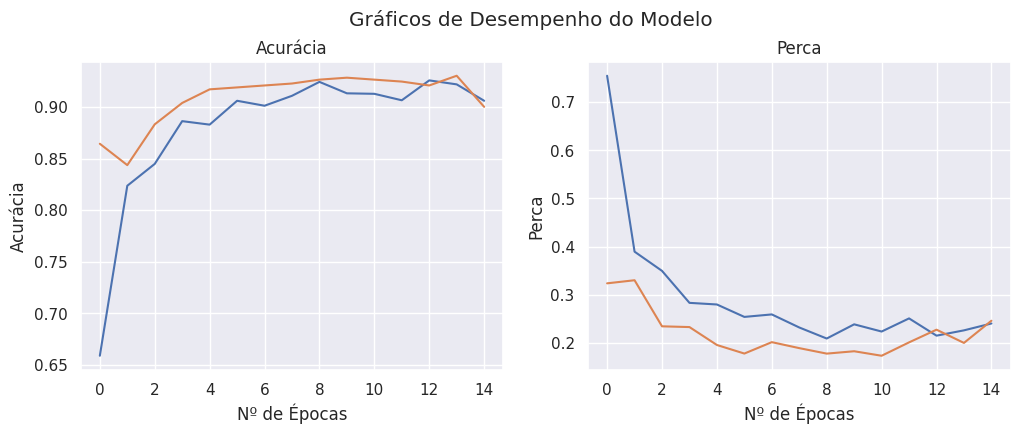

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

plt.suptitle('Gráficos de Desempenho do Modelo', y=1.01)
axs[0].plot(historico.history['accuracy'])
axs[0].plot(historico.history['val_accuracy'])
axs[0].set_title('Acurácia')
axs[0].set_xlabel('Nº de Épocas')
axs[0].set_ylabel('Acurácia')

axs[1].plot(historico.history['loss'])
axs[1].plot(historico.history['val_loss'])
axs[1].set_title('Perca')
axs[1].set_xlabel('Nº de Épocas')
axs[1].set_ylabel('Perca')
plt.show()

In [35]:
loss , acuracia = network.evaluate(imagens_val)

acuracia

531/531 [==============================] - 4s 7ms/step - loss: 0.2460 - accuracy: 0.9002


0.9001883268356323

In [36]:
previsoes = network.predict(imagens_val)
previsoes = np.argmax(previsoes, axis=1)
previsoes

531/531 [==============================] - 2s 3ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
imagens_val.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       245
           1       0.85      0.99      0.91       286

    accuracy                           0.90       531
   macro avg       0.92      0.89      0.90       531
weighted avg       0.91      0.90      0.90       531



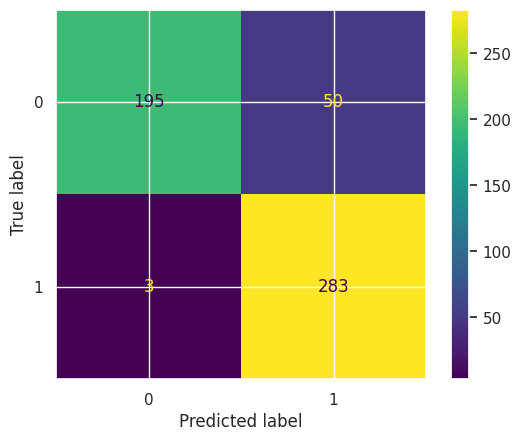

In [38]:
print(classification_report(imagens_val.classes, previsoes))
ConfusionMatrixDisplay.from_predictions(imagens_val.classes, previsoes);

### <font color='yellowgreen'> **Salvando Modelo**

In [39]:
modelo_json = network.to_json()

with open('classificador_0.90.json', 'w') as f:
    f.write(modelo_json)

In [40]:
network.save_weights('pesos_classificador_0.90.h5')

________________________________________________________________________________________________________________________

## <font color='yellowgreen'> **Transfer Learning <font color='red'>(loss: 1.4971 - accuracy: 0.8475)**

### <font color='yellowgreen'> **Estrutura**

In [44]:
resnet = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet.summary()

Exception ignored in: <function _xla_gc_callback at 0x7ab5d2c52b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [45]:
camada_densa = resnet.output
camada_densa = GlobalAveragePooling2D()(camada_densa)
camada_densa = Dense(units= 1025, activation='relu')(camada_densa)
camada_densa = Dropout(0.2)(camada_densa)
camada_densa = Dense(units= 1025, activation='relu')(camada_densa)
camada_densa = Dropout(0.2)(camada_densa)
camada_densa = Dense(units= 1025, activation='relu')(camada_densa)
camada_densa = Dropout(0.2)(camada_densa)
camada_densa_output = Dense(units= 2, activation='softmax')(camada_densa)

In [46]:
network_fine_tunning = Model(inputs= resnet.input, outputs= camada_densa_output)
network_fine_tunning.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

### <font color='yellowgreen'> **Treinando Modelo**

In [53]:
network_fine_tunning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resultados = network_fine_tunning.fit(imagens_treino, epochs= 15, validation_data= imagens_val)

Epoch 1/15
65/65 [==============================] - 85s 830ms/step - loss: 0.4052 - accuracy: 0.8367 - val_loss: 1.5042 - val_accuracy: 0.8267
Epoch 2/15
65/65 [==============================] - 47s 722ms/step - loss: 0.1694 - accuracy: 0.9485 - val_loss: 0.6835 - val_accuracy: 0.8004
Epoch 3/15
65/65 [==============================] - 46s 704ms/step - loss: 0.1313 - accuracy: 0.9619 - val_loss: 1.0392 - val_accuracy: 0.8719
Epoch 4/15
65/65 [==============================] - 47s 728ms/step - loss: 0.1096 - accuracy: 0.9668 - val_loss: 3.7660 - val_accuracy: 0.5348
Epoch 5/15
65/65 [==============================] - 47s 717ms/step - loss: 0.1051 - accuracy: 0.9677 - val_loss: 0.3366 - val_accuracy: 0.9529
Epoch 6/15
65/65 [==============================] - 51s 776ms/step - loss: 0.1240 - accuracy: 0.9639 - val_loss: 2.4554 - val_accuracy: 0.8324
Epoch 7/15
65/65 [==============================] - 51s 775ms/step - loss: 0.1103 - accuracy: 0.9658 - val_loss: 3.9802 - val_accuracy: 0.8475

### <font color='yellowgreen'> **Avaliando o Modelo**

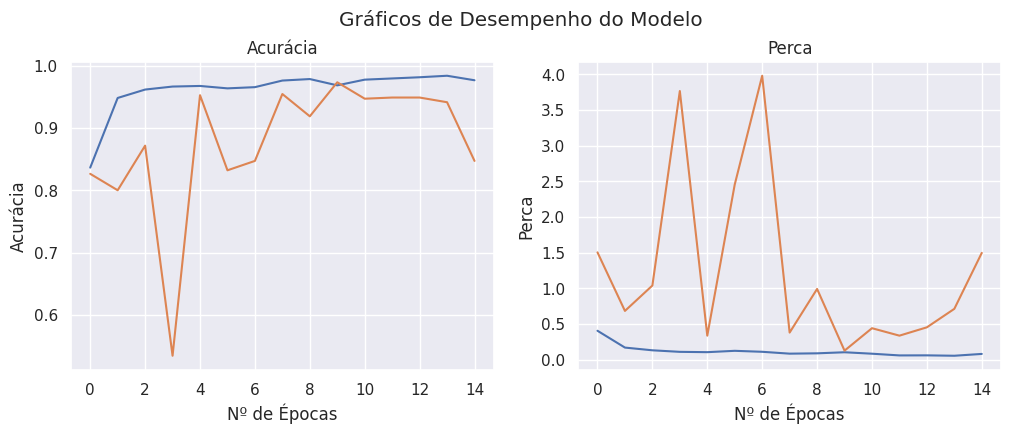

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

plt.suptitle('Gráficos de Desempenho do Modelo', y=1.01)
axs[0].plot(resultados.history['accuracy'])
axs[0].plot(resultados.history['val_accuracy'])
axs[0].set_title('Acurácia')
axs[0].set_xlabel('Nº de Épocas')
axs[0].set_ylabel('Acurácia')

axs[1].plot(resultados.history['loss'])
axs[1].plot(resultados.history['val_loss'])
axs[1].set_title('Perca')
axs[1].set_xlabel('Nº de Épocas')
axs[1].set_ylabel('Perca')
plt.show()

In [57]:
previsoes_imagenet = network_fine_tunning.predict(imagens_val)
previsoes_imagenet = np.argmax(previsoes_imagenet, axis=1)

531/531 [==============================] - 7s 10ms/step


              precision    recall  f1-score   support

           0       1.00      0.67      0.80       245
           1       0.78      1.00      0.88       286

    accuracy                           0.85       531
   macro avg       0.89      0.83      0.84       531
weighted avg       0.88      0.85      0.84       531



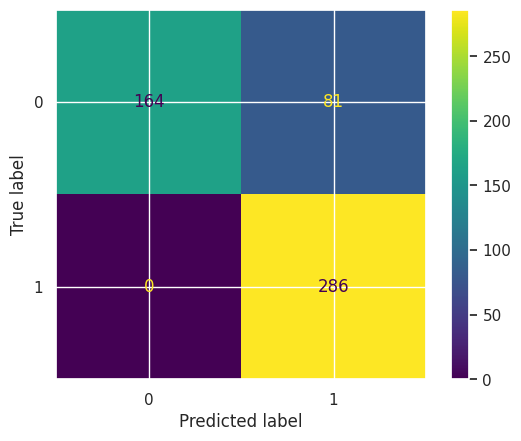

In [58]:
print(classification_report(imagens_val.classes, previsoes_imagenet))
ConfusionMatrixDisplay.from_predictions(imagens_val.classes, previsoes_imagenet);

In [60]:
loss, acc = network_fine_tunning.evaluate(imagens_val)

531/531 [==============================] - 7s 12ms/step - loss: 1.4971 - accuracy: 0.8475
